In [7]:
import numpy as np
import pylab
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter, ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator, BackendSampler
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms import VQD, VQE, SamplingVQE, NumPyEigensolver
from qiskit_algorithms.optimizers import COBYLA, SPSA, SLSQP
from qiskit_algorithms.gradients import DerivativeType, LinCombQGT, LinCombEstimatorGradient
from qiskit_algorithms.state_fidelities import BaseStateFidelity, ComputeUncompute

from qiskit_nature.second_q.hamiltonians.lattices import LineLattice, BoundaryCondition
from qiskit_nature.second_q.hamiltonians.ising_model import IsingModel
# from qiskit.quantum_info import Operator
# from qiskit.quantum_info.operators.base_operator import BaseOperator

import matplotlib.pyplot as plt

from qiskit import Aer

In [8]:
simulator = Aer.get_backend('aer_simulator')
# aer_backend = BackendEstimator(simulator, options={"shots": 500})
# machine = 'H1-2E'
# backend_emu = QuantinuumBackend(device_name=machine)
# backend_emu.login()
# qis_backend = TketBackend(backend_emu, backend_emu.default_compilation_pass(optimisation_level=2))
# qestimator = BackendEstimator(qis_backend, options={"shots": 100})

class Params:
    def __init__(self, num_qubits: int, no_of_states_to_compute: int, use_quant, 
                 uniform_interaction, uniform_onsite_potential,
                 max_vqe_iterations):
        self.num_qubits = num_qubits
        self.no_of_states_to_compute = no_of_states_to_compute
        self.hamiltonian_op = self.__get_hamiltonian__(uniform_interaction, uniform_onsite_potential)
        self.max_vqe_iterations = max_vqe_iterations
        self.use_quant = use_quant
            
    
    def __get_hamiltonian__(self, uniform_interaction, uniform_onsite_potential):
        list_ops = [("Z"*self.num_qubits, uniform_interaction),]
        for i in range(self.num_qubits):
            op = ('I'*(i-1) + 'X' + 'I'*(self.num_qubits - i), uniform_onsite_potential)
            list_ops.append(op)
        H_op = SparsePauliOp.from_list(list_ops)
        return H_op

VQD res:  [-1.25654293+0.j -0.26525499+0.j -0.4806287 +0.j  0.21769589+0.j
  0.49893786+0.j]
Sim res:  [-2.23606798 -2.23606798 -1.56204994 -1.56204994 -1.56204994]


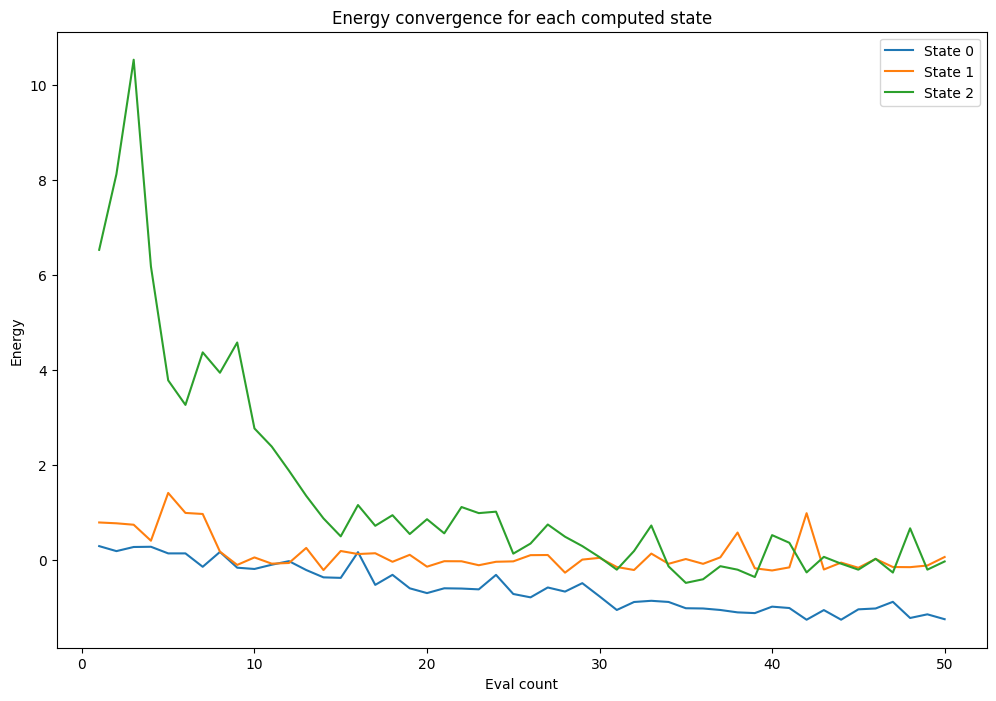

In [9]:
counts = []
values = []
steps = []

def callback(eval_count, params, value, meta, step):
    counts.append(eval_count)
    values.append(value)
    steps.append(step)

if __name__ == "__main__":
    # TODO: which on has to be less than 1?
    params = Params(num_qubits = 5, no_of_states_to_compute = 5, use_quant = False, 
                 uniform_interaction=-1.0, uniform_onsite_potential=-0.4,
                 max_vqe_iterations=100)
    betas = [10*(0.5)**(i) for i in range(params.no_of_states_to_compute)]
    ansatz = EfficientSU2(params.num_qubits, entanglement="linear")

    estimator = Estimator()
    optimizer = COBYLA(maxiter=50)
    sampler = BackendSampler(simulator)
    # TODO: is this good?
    fidelity = ComputeUncompute(sampler)


    # vqd = VQD(estimator, fidelity, ansatz, optimizer, k=params.no_of_states_to_compute, betas=[33]*params.no_of_states_to_compute, callback=callback)
    vqd = VQD(estimator, fidelity, ansatz, optimizer, k=params.no_of_states_to_compute, callback=callback)
    result = vqd.compute_eigenvalues(params.hamiltonian_op)
    print("VQD res: ", result.eigenvalues)

    exact_solver = NumPyEigensolver(k=params.num_qubits)
    exact_result = exact_solver.compute_eigenvalues(params.hamiltonian_op)
    ref_values = exact_result.eigenvalues
    print("Sim res: ", ref_values)

pylab.rcParams["figure.figsize"] = (12, 8)

steps = np.asarray(steps)
counts = np.asarray(counts)
values = np.asarray(values)

for i in range(1,4):
    _counts = counts[np.where(steps == i)]
    _values = values[np.where(steps == i)]
    pylab.plot(_counts, _values, label=f"State {i-1}")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for each computed state")
pylab.legend(loc="upper right")

VQD res:  [-2.23604974+0.j  1.30198158+0.j 31.33127846+0.j 61.82676323+0.j
 91.94651283+0.j]
Sim res:  [-2.23606798 -2.23606798 -1.56204994 -1.56204994 -1.56204994]


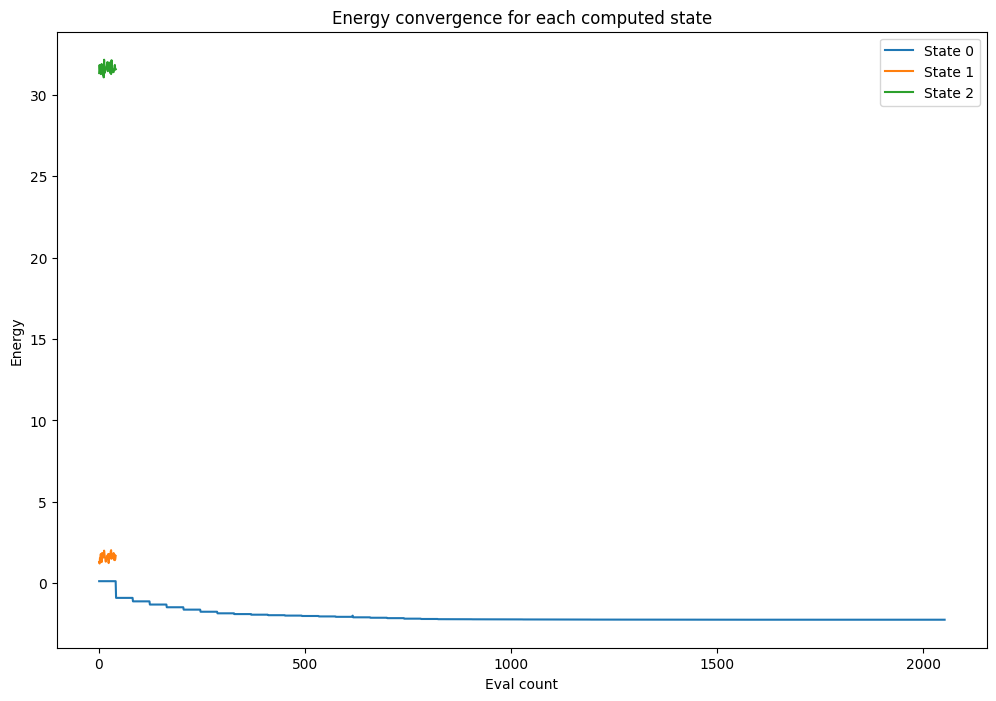

In [10]:
counts = []
values = []
steps = []

def callback(eval_count, params, value, meta, step):
    counts.append(eval_count)
    values.append(value)
    steps.append(step)

if __name__ == "__main__":
    # TODO: which on has to be less than 1?
    params = Params(num_qubits = 5, no_of_states_to_compute = 5, use_quant = False, 
                 uniform_interaction=-1.0, uniform_onsite_potential=-0.4,
                 max_vqe_iterations=100)
    betas = [10*(0.5)**(i) for i in range(params.no_of_states_to_compute)]
    ansatz = EfficientSU2(params.num_qubits, entanglement="linear")

    estimator = Estimator()
    optimizer = SLSQP(maxiter=50)
    sampler = BackendSampler(simulator)
    # TODO: is this good?
    fidelity = ComputeUncompute(sampler)


    # vqd = VQD(estimator, fidelity, ansatz, optimizer, k=params.no_of_states_to_compute, betas=[33]*params.no_of_states_to_compute, callback=callback)
    vqd = VQD(estimator, fidelity, ansatz, optimizer, k=params.no_of_states_to_compute, callback=callback)
    result = vqd.compute_eigenvalues(params.hamiltonian_op)
    print("VQD res: ", result.eigenvalues)

    exact_solver = NumPyEigensolver(k=params.num_qubits)
    exact_result = exact_solver.compute_eigenvalues(params.hamiltonian_op)
    ref_values = exact_result.eigenvalues
    print("Sim res: ", ref_values)

pylab.rcParams["figure.figsize"] = (12, 8)

steps = np.asarray(steps)
counts = np.asarray(counts)
values = np.asarray(values)

for i in range(1,4):
    _counts = counts[np.where(steps == i)]
    _values = values[np.where(steps == i)]
    pylab.plot(_counts, _values, label=f"State {i-1}")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for each computed state")
pylab.legend(loc="upper right")

In [11]:
params = Params(num_qubits = 5, no_of_states_to_compute = 4, use_quant = False, 
                 uniform_interaction=-1.0, uniform_onsite_potential=-1.0,
                 max_vqe_iterations=50)
exact_solver = NumPyEigensolver(k=params.num_qubits)
exact_result = exact_solver.compute_eigenvalues(params.hamiltonian_op)
ref_values = exact_result.eigenvalues
print("Sim res: ", ref_values)

Sim res:  [-5.09901951 -5.09901951 -3.16227766 -3.16227766 -3.16227766]


# New

In [12]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter, ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator, BackendSampler
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms import VQD, VQE, SamplingVQE, NumPyEigensolver
from qiskit_algorithms.optimizers import COBYLA, SPSA, SLSQP
from qiskit_algorithms.gradients import DerivativeType, LinCombQGT, LinCombEstimatorGradient
from qiskit_algorithms.state_fidelities import BaseStateFidelity, ComputeUncompute

from qiskit_nature.second_q.hamiltonians.lattices import LineLattice, BoundaryCondition
from qiskit_nature.second_q.hamiltonians.ising_model import IsingModel
from qiskit.quantum_info import Operator
# from qiskit.quantum_info.operators.base_operator import BaseOperator

import matplotlib.pyplot as plt

from qiskit import Aer
import numpy as np

In [13]:
simulator = Aer.get_backend('aer_simulator')
counts = []
values = []
steps = []
# aer_backend = BackendEstimator(simulator, options={"shots": 500})
# machine = 'H1-2E'
# backend_emu = QuantinuumBackend(device_name=machine)
# backend_emu.login()
# qis_backend = TketBackend(backend_emu, backend_emu.default_compilation_pass(optimisation_level=2))
# qestimator = BackendEstimator(qis_backend, options={"shots": 100})

In [14]:

class Params:
    def __init__(self, num_qubits: int, no_of_states_to_compute: int, use_quant, 
                 uniform_interaction, uniform_onsite_potential,
                 optimizer):
        self.num_qubits = num_qubits
        self.no_of_states_to_compute = no_of_states_to_compute
        self.hamiltonian_op = self.__get_hamiltonian__(uniform_interaction, uniform_onsite_potential)
        self.use_quant = use_quant
        self.optimizer = optimizer
    
            
    
    def __get_hamiltonian__(self, uniform_interaction, uniform_onsite_potential):
        line_lattice = LineLattice(num_nodes=self.num_qubits, boundary_condition=BoundaryCondition.OPEN)

        ising_model = IsingModel(
            line_lattice.uniform_parameters(
                uniform_interaction,
                uniform_onsite_potential
            ),
        )
        ham = ising_model.second_q_op()
        ham_operator = Operator(ham.to_matrix())
        # print('numpy soln', np.linalg.eigvals(ham_operator))
        return SparsePauliOp.from_operator(ham_operator)


def callback(eval_count, params, value, meta, step):
    counts.append(eval_count)
    values.append(value)
    steps.append(step)

In [31]:
counts = []
values = []
steps = []

if __name__ == "__main__":
    # TODO: which on has to be less than 1?
    optimizer_slsqp = SLSQP(maxiter=100)
    optimizer_cobyla = COBYLA(maxiter=100)
    params = Params(num_qubits = 3, no_of_states_to_compute = 3, use_quant = False, 
                    uniform_interaction=-1.0, uniform_onsite_potential=-0.4, 
                    optimizer=optimizer_cobyla)
    
    estimator = Estimator()
    for opt in [optimizer_slsqp, optimizer_cobyla]:
        counts  = []
        values = []
        steps = []
        
        ansatz = EfficientSU2(params.num_qubits, entanglement="linear")
        
        sampler = BackendSampler(simulator)
        fidelity = ComputeUncompute(sampler)


        # vqd = VQD(estimator, fidelity, ansatz, optimizer, k=params.no_of_states_to_compute, betas=[33]*params.no_of_states_to_compute, callback=callback)
        vqd = VQD(estimator, fidelity, ansatz, params.optimizer, k=params.no_of_states_to_compute, callback=callback)
        result = vqd.compute_eigenvalues(params.hamiltonian_op)
        print('VQD res: ', result.eigenvalues.real)

        exact_solver = NumPyEigensolver(k=params.num_qubits)
        exact_result = exact_solver.compute_eigenvalues(params.hamiltonian_op)
        ref_values = exact_result.eigenvalues
        print('Sim res: ', ref_values)

        steps = np.asarray(steps)
        counts = np.asarray(counts)
        values = np.asarray(values)

        for i in range(1,4):
            _counts = counts[np.where(steps == i)]
            _values = values[np.where(steps == i)]
            plt.plot(_counts, _values, label=f"State {i-1}")

        plt.xlabel("Eval count")
        plt.ylabel("Energy")
        plt.title("Energy convergence for each computed state")
        plt.legend(loc="upper right")
        plt.show()


TypeError: Params.__init__() missing 1 required positional argument: 'max_vqe_iterations'